The purpose of this script is to visualize the different classes of waste

In [ ]:
#Connect to GoogleDrive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Install necessary libraries
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [ ]:
#Set-up directory
os.chdir('/content/drive/My Drive/Colab Notebooks')

In [ ]:
#Path to the main folder containing preprocessed images
main_folder = 'Preprocessed_Images'

In [ ]:
#List of categories
categories = ['battery', 'plastic', 'paper', 'cardboard', 'glass', 'food_waste', 'metal']

In [ ]:
#Function to load images from a specific category and index
def load_image(category, index):
    category_folder = os.path.join(main_folder, category)
    image_files = os.listdir(category_folder)
    image_path = os.path.join(category_folder, image_files[index])
    image = Image.open(image_path)
    return image

In [ ]:
#Sample data
total_images = [len(os.listdir(os.path.join(main_folder, category))) for category in categories]
train_total = int(sum(total_images) * 0.7)
test_total = int(sum(total_images) * 0.15)
val_total = int(sum(total_images) * 0.15)

In [ ]:
#Sort categories and corresponding total image counts in descending order
sorted_categories = [cat for _, cat in sorted(zip(total_images, categories), reverse=True)]
sorted_total_images = sorted(total_images, reverse=True)

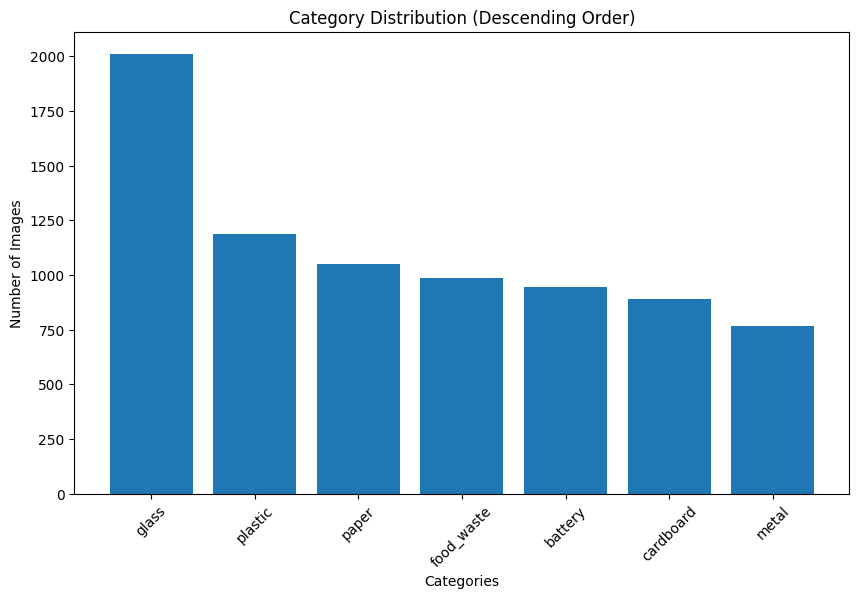

In [ ]:
#Step 1: Category Distribution Histogram
plt.figure(figsize=(10, 6))
plt.bar(sorted_categories, sorted_total_images)
plt.xlabel('Categories')
plt.ylabel('Number of Images')
plt.title('Category Distribution (Descending Order)')
plt.xticks(rotation=45)
plt.show()

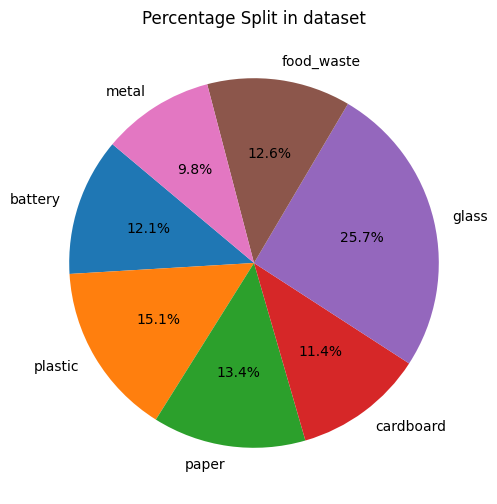

In [ ]:
#Step 2 Percentage Split Visualization
total_images_all_categories = sum(total_images)
percentage_split = [count / total_images_all_categories for count in total_images]

plt.figure(figsize=(10, 6))
plt.pie(percentage_split, labels=categories, autopct='%1.1f%%', startangle=140)
plt.title('Percentage Split in dataset')
plt.show()

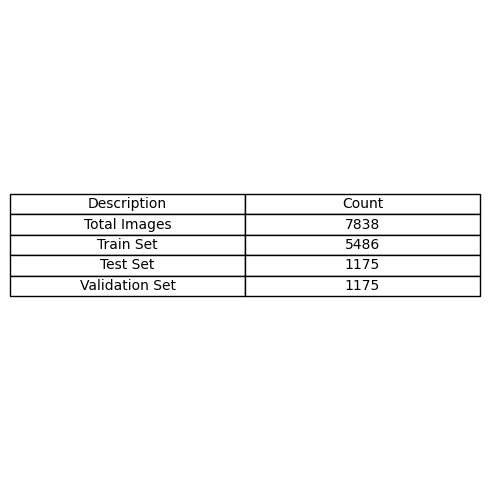

In [ ]:
#Step 3: Table of number of images

#Display the table separately
table_data = [
    ['Total Images', sum(total_images)],
    ['Train Set', train_total],
    ['Test Set', test_total],
    ['Validation Set', val_total]
]

plt.figure(figsize=(5, 5))
plt.table(cellText=table_data, colLabels=['Description', 'Count'], cellLoc='center', loc='center')
plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
#Calculate the total number of images in each set for each category
train_images_per_category = [count * 0.7 for count in total_images]
test_images_per_category = [count * 0.15 for count in total_images]
val_images_per_category = [count * 0.15 for count in total_images]

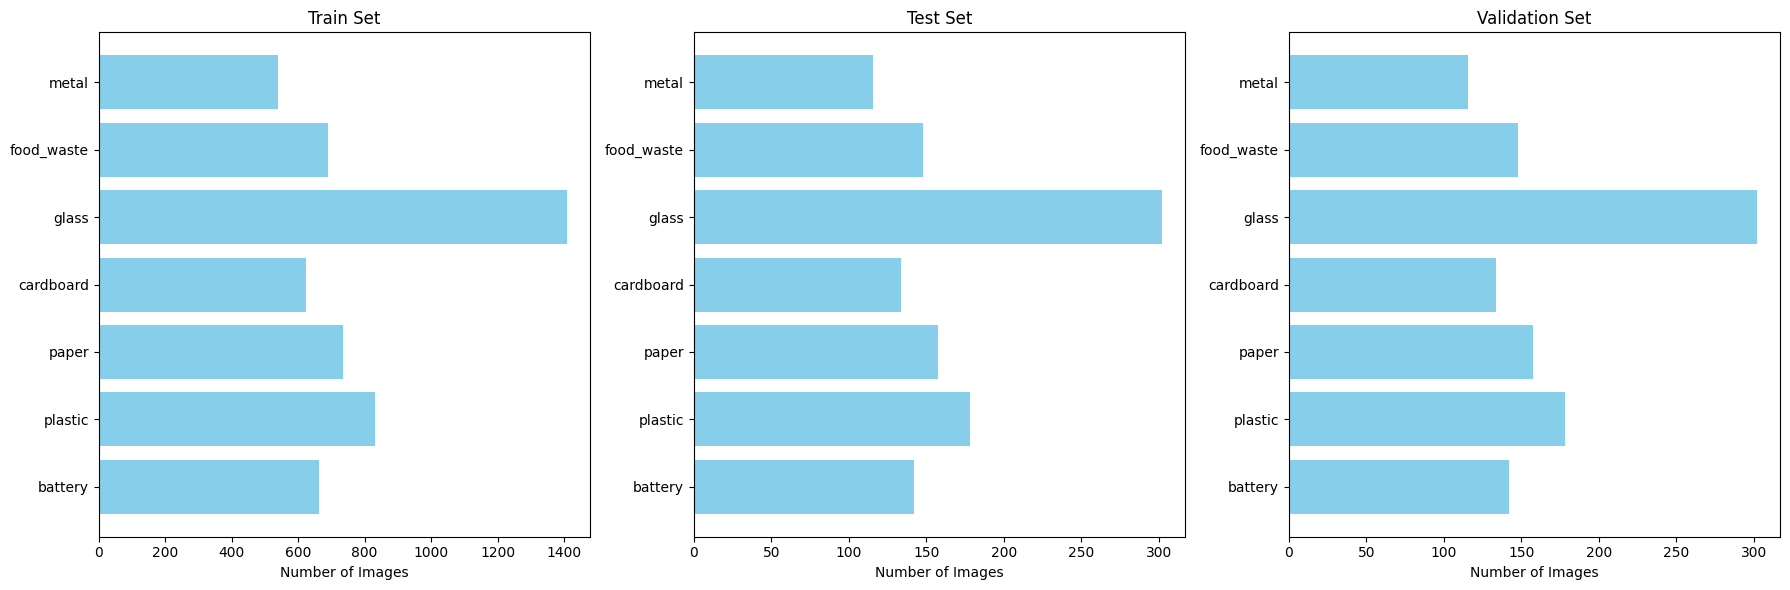

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

def plot_bar(ax, set_images_per_category, title):
    ax.barh(categories, set_images_per_category, color='skyblue')
    ax.set_xlabel('Number of Images')
    ax.set_title(title)

plot_bar(axes[0], train_images_per_category, 'Train Set')
plot_bar(axes[1], test_images_per_category, 'Test Set')
plot_bar(axes[2], val_images_per_category, 'Validation Set')

plt.tight_layout()
plt.show()


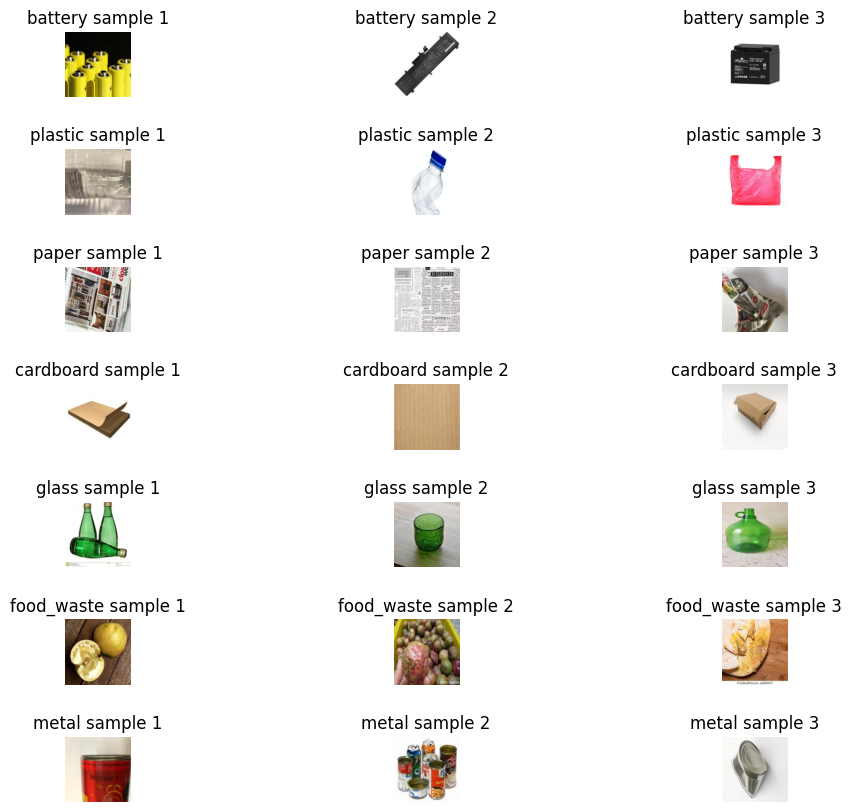

In [ ]:
#Step 5: Sample Images Display
num_samples_per_category = 3
vertical_spacing = 0.8  # Adjust this value as needed

fig, axes = plt.subplots(len(categories), num_samples_per_category, figsize=(12, 10), gridspec_kw={'hspace': vertical_spacing})

for i, category in enumerate(categories):
    sample_indices = np.random.choice(total_images[i], size=num_samples_per_category, replace=False)
    for j, index in enumerate(sample_indices):
        image = load_image(category, index)
        axes[i, j].imshow(image)
        axes[i, j].axis('off')
        axes[i, j].set_title(f'{category} sample {j + 1}')
